In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"US/Eastern\"")

In [ ]:
hex_project_id = _hex_json.loads("\"0195da51-07e4-7003-883f-38f64a6221cb\"")

In [ ]:
hex_project_name = _hex_json.loads("\"3162 Project 3\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
missing_values = train_df.isnull().sum() / len(train_df)
columns_to_drop = missing_values[missing_values > 0.3].index
train_df = train_df.drop(columns=columns_to_drop)

In [ ]:
for col in train_df.select_dtypes(include=["number"]).columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())  

for col in train_df.select_dtypes(include=["object"]).columns:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0]) 

hex_cell_0195de3d-7e60-7ddb-b564-ea54d3359169.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


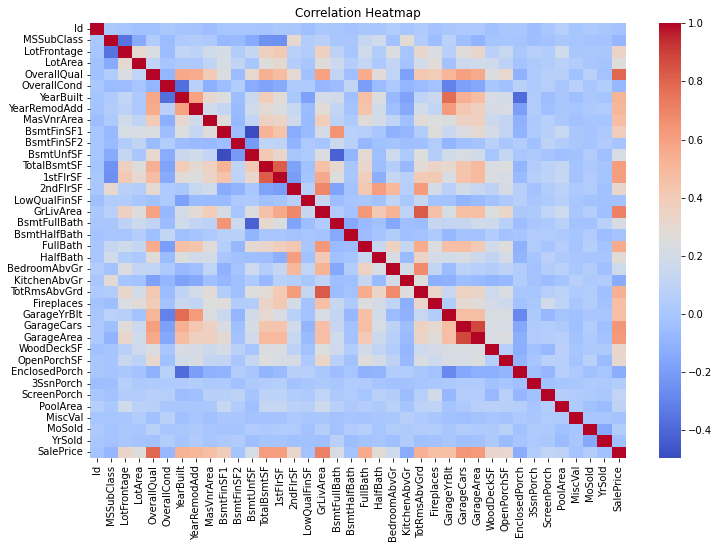

In [ ]:
#correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
high_corr_features = ["OverallQual", "GrLivArea", "TotalBsmtSF", "SalePrice"]
train_df[high_corr_features].corr()

,OverallQual,GrLivArea,TotalBsmtSF,SalePrice
OverallQual,1.000000,0.593007,0.537808,0.790982
GrLivArea,0.593007,1.000000,0.454868,0.708624
TotalBsmtSF,0.537808,0.454868,1.000000,0.613581
SalePrice,0.790982,0.708624,0.613581,1.000000


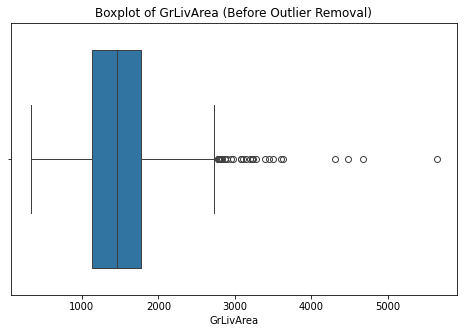

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df["GrLivArea"])
plt.title("Boxplot of GrLivArea (Before Outlier Removal)")
plt.show()

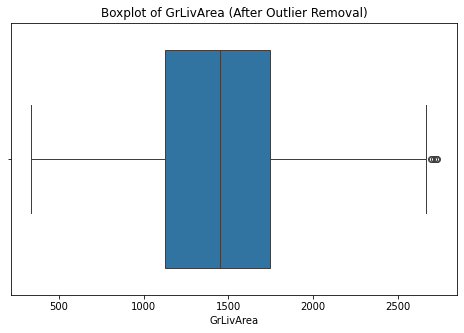

In [ ]:
Q1 = train_df["GrLivArea"].quantile(0.25)
Q3 = train_df["GrLivArea"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_df = train_df[(train_df["GrLivArea"] >= lower_bound) & (train_df["GrLivArea"] <= upper_bound)]

plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df["GrLivArea"])
plt.title("Boxplot of GrLivArea (After Outlier Removal)")
plt.show()

In [ ]:
numf = X.select_dtypes(include=["int64", "float64"]).columns
catf = X.select_dtypes(include=["object"]).columns

In [ ]:
#preprocessing pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numf),
    ("cat", cat_pipeline, catf)
])

In [ ]:
# training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# define and train model
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num',
 Pipeline(steps=[('imputer',
 SimpleImputer(strategy='median')),
 ('scaler',
 StandardScaler())]),
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'L...
 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
 'PavedDrive', 'SaleType', 'SaleCondition'],
 dtype='object'))])),
 ('regressor', LinearRegression())]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.   Pipeline ? Documentation for Pipeline i Fitted Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num',
 Pipeline(steps=[('imputer',
 SimpleImputer(strategy='median')),
 ('scaler',
 StandardScaler())]),
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'L...
 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
 'PavedDrive', 'SaleType', 'SaleCondition'],
 dtype='object'))])),
 ('regressor', LinearRegression())])  preprocessor: ColumnTransformer ? Documentation for preprocessor: ColumnTransformer ColumnTransformer(transformers=[('num',
 Pipeline(steps=[('imputer',
 SimpleImputer(strategy='median')),
 ('scaler', StandardScaler())]),
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
 'GrLivArea', 'BsmtFu...
 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
 'PavedDrive', 'SaleType', 'SaleCondition'],
 dtype='object'))]) num Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
 'MoSold', 'YrSold'],
 dtype='object')  SimpleImputer ? Documentation for SimpleImputer SimpleImputer(strategy='median')  StandardScaler ? Documentation for StandardScaler StandardScaler() cat Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
 'PavedDrive', 'SaleType', 'SaleCondition'],
 dtype='object')  SimpleImputer ? Documentation for SimpleImputer SimpleImputer(strategy='most

In [ ]:
# predictions
y_pred = model.predict(X_val)

# evaluate model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

RMSE: 20948.78977668887
